   age  income      gender  time_spent preferred_platform   interests  \
0   51   94413      female         4.5           Facebook      Sports   
1   64   87851      female         1.0           Facebook  Technology   
2   41   68087      female         4.5          Instagram        Food   
3   27   30988        male         5.0          Instagram       Music   
4   55   79214  non-binary         1.0          Instagram      Sports   

  demographics  posts_per_week  exercise_hours  
0     Suburban               7             5.5  
1        Urban              14             8.0  
2        Rural               1            10.0  
3        Urban               3             7.0  
4        Rural              11             4.5  
                age        income  gender   time_spent preferred_platform  \
count   2000.000000   2000.000000    2000  2000.000000               2000   
unique          NaN           NaN       3          NaN                  5   
top             NaN           NaN  f

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

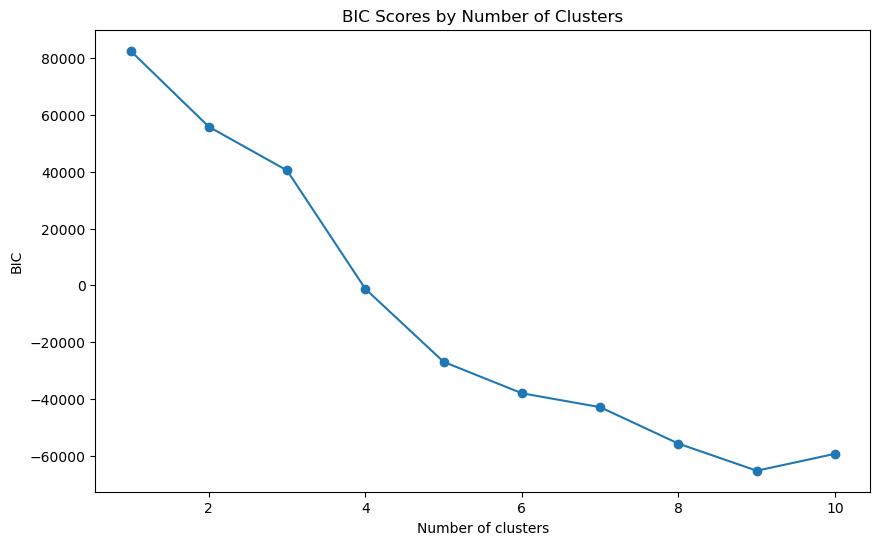

Optimal number of clusters: 9
Silhouette Score: 0.13611199712659827


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'Updated_Social_Media_Usage_Data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset and the data summary
print(data.head())
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

# Assuming there are no major issues with the data, we move to preprocessing.
# Let's preprocess the data.

# Convert categorical columns to numeric if any
# Here we need to know the specific columns, which should be encoded. For now, I'll assume a generic approach.
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_data, test_data = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Model Selection
# We'll start with a range of possible cluster counts and evaluate each using BIC.
n_components = range(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(train_data) for n in n_components]
bics = [m.bic(train_data) for m in models]
plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC Scores by Number of Clusters')
plt.show()

# Choose the model with the lowest BIC
optimal_n = n_components[bics.index(min(bics))]
print(f'Optimal number of clusters: {optimal_n}')

# Building the model
gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=42)
gmm.fit(train_data)

# Evaluate the model
labels = gmm.predict(test_data)
silhouette = silhouette_score(test_data, labels)
print(f'Silhouette Score: {silhouette}')

# Prediction example
def predict_social_media_type(new_data):
    new_data_transformed = scaler.transform(new_data)
    new_data_cluster = gmm.predict(new_data_transformed)
    return new_data_cluster

# Example of using the predict function
# Assume new_data is a dataframe with the same structure as the input data (excluding the target feature)
# example_new_data = pd.DataFrame(...)  
# cluster_of_new_data = predict_social_media_type(example_new_data)
# print(cluster_of_new_data)
